In [1]:
import matplotlib.pyplot as plt
import networkx as nx

from graph_merge.merge_graphs import GraphMerger

In [2]:
# Create graphs where "name" attribute is a capital letter. Subscript is the unique node identifier

G1 = nx.Graph(
    [
        ("A$_1$", "B$_2$"),
        ("B$_2$", "B$_3$"),
        ("A$_1$", "B$_3$"),
        ("C$_4$", "D$_5$"),
        ("C$_4$", "E$_6$"),
        ("A$_1$", "C$_7$"),
        ("C$_7$", "D$_8$"),
        ("C$_7$", "D$_9$"),
        ("F$_{10}$", "B$_2$"),
        ("A$_1$", "C$_4$"),
        ("A$_1$", "H$_{11}$"),
        ("A$_1$", "G$_{12}$"),
        ("A$_1$", "H$_{13}$"),
    ]
)
G1_attributes = {n: n[0] for n in G1.nodes()}
nx.set_node_attributes(G1, G1_attributes, "name")

G2 = nx.Graph(
    [
        ("a$_{15}$", "b$_{16}$"),
        ("b$_{16}$", "b$_{17}$"),
        ("a$_{15}$", "c$_{18}$"),
        ("i$_{19}$", "c$_{18}$"),
        ("c$_{18}$", "e$_{20}$"),
        ("a$_{15}$", "c$_{21}$"),
        ("c$_{21}$", "d$_{23}$"),
        ("c$_{21}$", "d$_{22}$"),
        ("f$_{24}$", "b$_{16}$"),
        ("a$_{15}$", "c$_{18}$"),
        ("a$_{15}$", "g$_{26}$"),
        ("a$_{15}$", "b$_{17}$"),
        ("a$_{15}$", "h$_{25}$"),
    ]
)
G2_attributes = {n: n[0].capitalize() for n in G2.nodes()}
nx.set_node_attributes(G2, G2_attributes, "name")

In [3]:
# Set position so all figures have nodes in the same place
final_pos = {
    "A$_1$": ([-0.00143288, 0.01345927]),
    "B$_2$": ([0.29290025, 0.44960688]),
    "B$_3$": ([0.6119995047565133, 0.112487088257229884]),
    "C$_4$": ([0.45887244, -0.39516747]),
    "D$_5$": ([0.60200048, -0.773732]),
    "E$_6$": ([0.8451652, -0.50611253]),
    "C$_7$": ([-0.61006323, 0.11082043]),
    "D$_8$": ([-0.94234635, 0.3451623]),
    "D$_9$": ([-1.0, -0.01299926]),
    "F$_{10}$": ([0.50209519, 0.79955129]),
    "H$_{11}$": ([-0.16126408, 0.3430046]),
    "G$_{12}$": ([0.00279235, -0.55270513]),
    "H$_{13}$": ([-0.43991932, -0.33337547]),
    "a$_{15}$": ([-0.00143288, 0.01345927]),
    "b$_{16}$": ([0.29290025, 0.44960688]),
    "b$_{17}$": ([0.6119995047565133, 0.112487088257229884]),
    "c$_{18}$": ([0.45887244, -0.39516747]),
    "i$_{19}$": ([0.30200048, -0.773732]),
    "e$_{20}$": ([0.8451652, -0.50611253]),
    "c$_{21}$": ([-0.61006323, 0.11082043]),
    "d$_{22}$": ([-0.94234635, 0.3451623]),
    "d$_{23}$": ([-1.0, -0.01299926]),
    "f$_{24}$": ([0.50209519, 0.79955129]),
    "h$_{25}$": ([-0.16126408, 0.3430046]),
    "g$_{26}$": ([0.00279235, -0.55270513]),
    "27": ([-0.43991932, -0.33337547]),
}

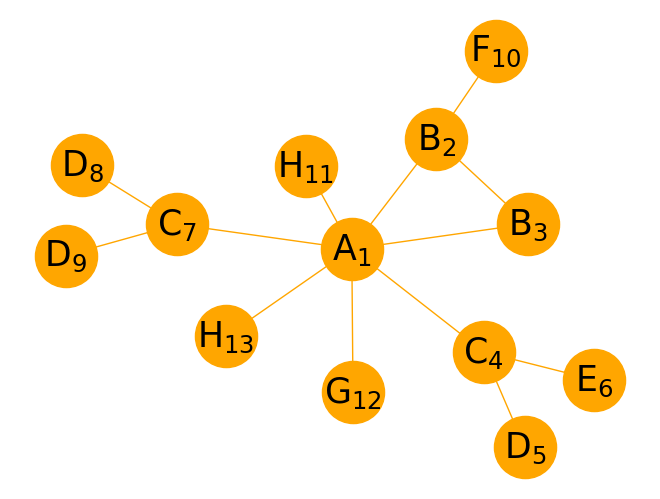

In [4]:
nx.draw(G1, pos=final_pos, with_labels=True, node_color="#FFA600", node_size=2000, font_size=25, edge_color="#FFA600")

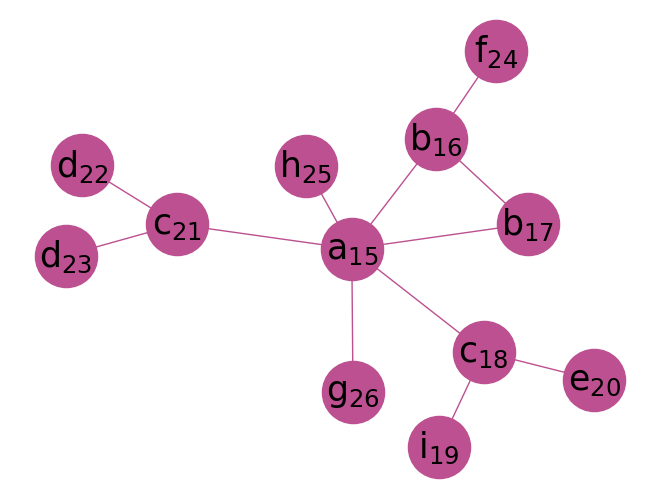

In [5]:
nx.draw(G2, with_labels=True, pos=final_pos, node_color="#BC5090", node_size=2000, font_size=25, edge_color="#BC5090")

In [6]:
# Run the example
A = GraphMerger(G1, G2)
dfs_map = A.get_depth_first_search_map(
    attributes=["name"], match_function_args={"exact_match": {}}, g1_starting_node="A$_1$", g2_starting_node="a$_{15}$"
)
A.create_merge_graph_from_mapping(dfs_map, collapse=False)

Starting node is: A$_1$ mapping to a$_{15}$


In [7]:
# Print the node map
dfs_map.node_map

{'A$_1$': {'a$_{15}$'},
 'H$_{13}$': {'h$_{25}$'},
 'G$_{12}$': {'g$_{26}$'},
 'C$_7$': {'c$_{21}$'},
 'C$_4$': {'c$_{18}$'},
 'B$_3$': {'b$_{17}$'},
 'B$_2$': {'b$_{16}$'},
 'D$_9$': {'d$_{22}$'},
 'D$_8$': {'d$_{23}$'},
 'E$_6$': {'e$_{20}$'},
 'F$_{10}$': {'f$_{24}$'}}

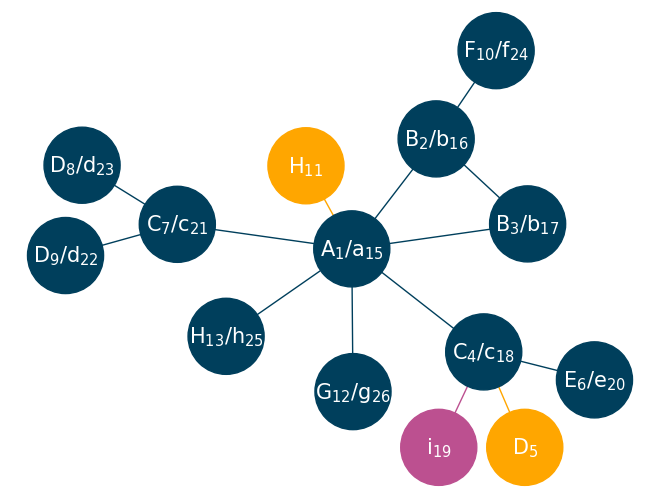

In [8]:
# Draw the merged graph

# Create node labels with G1 and G2 node names
labels = {n: n for n in G1.nodes()}
for g1, g2 in dfs_map.node_map.items():
    labels[g1] = f"{g1}/{next(iter(g2))[0].strip()}"

G2_mapped = [next(iter(n))[0] for n in dfs_map.node_map.values()]
for n in G2.nodes():
    if n not in G2_mapped:
        labels[n] = n  # noqa: PERF403

# Draw
nx.draw(
    A.current_graph,
    with_labels=True,
    labels=labels,
    pos=final_pos,
    node_color=[n[1]["color"] for n in A.current_graph.nodes(data=True)],
    edge_color=[n[2]["color"] for n in A.current_graph.edges(data=True)],
    node_size=3000,
    font_color="white",
    font_size=15,
)
# Save figure
plt.savefig("example.png", format="png")

In [9]:
# Save graph as gml
A.save_gml("example.gml")